<a href="https://colab.research.google.com/github/Srikanthr7/SENTIMENT-ANALYSIS-WITH-NLP-/blob/main/SENTIMENT_ANALYSIS_WITH_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SENTIMENT ANALYSIS - CUSTOMER REVIEWS




Dataset shape: (2000, 2)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,label
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard's quick movie review \ndamn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' firs...",neg
4,synopsis : a mentally unstable man undergoing ...,neg


Cleaning text...


,text,label,clean_text
0,"plot : two teen couples go to a church party ,...",neg,plot two teen couple go church party drink dri...
1,the happy bastard's quick movie review \ndamn ...,neg,happy bastard quick movie review damn k bug go...
2,it is movies like these that make a jaded movi...,neg,movie like make jaded movie viewer thankful in...
3,""" quest for camelot "" is warner bros . ' firs...",neg,quest camelot warner bros first feature length...
4,synopsis : a mentally unstable man undergoing ...,neg,synopsis mentally unstable man undergoing psyc...



Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

         neg       0.86      0.81      0.84       200
         pos       0.82      0.87      0.84       200

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



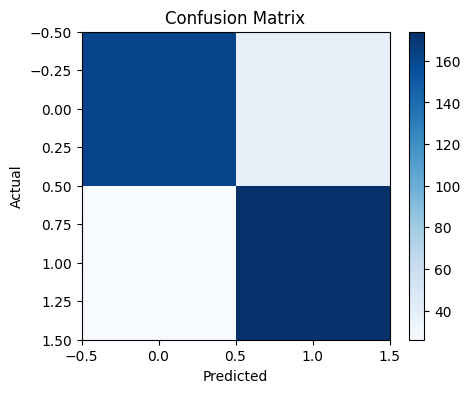


Sample: The movie was absolutely fantastic, I loved every moment!
Predicted Sentiment: pos


In [7]:
# =========================================
# SENTIMENT ANALYSIS WITH NLP (Google Colab)
# =========================================

# --- Step 1: Install & Import Libraries ---
import nltk
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords, movie_reviews
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# --- Step 2: Download NLTK Data ---
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError: # Changed from nltk.downloader.DownloadError
    nltk.download('punkt_tab')
try:
    nltk.data.find('corpora/movie_reviews')
except LookupError: # Changed from nltk.downloader.DownloadError
    nltk.download('movie_reviews')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError: # Changed from nltk.downloader.DownloadError
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except LookupError: # Changed from nltk.downloader.DownloadError
    nltk.download('stopwords')
try:
    nltk.data.find('corpora/wordnet')
except LookupError: # Changed from nltk.downloader.DownloadError
    nltk.download('wordnet')


# --- Step 3: Load Dataset ---
# Option 1: Use built-in NLTK movie reviews dataset
texts, labels = [], []
for fileid in movie_reviews.fileids():
    texts.append(movie_reviews.raw(fileid))
    labels.append(movie_reviews.categories(fileid)[0])  # 'pos' or 'neg'

# Option 2: If you have your own CSV, upload in Colab and uncomment below:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv("your_file.csv")   # ensure columns: text, label
# texts, labels = df['text'], df['label']

df = pd.DataFrame({'text': texts, 'label': labels})
print("Dataset shape:", df.shape)
display(df.head())

# --- Step 4: Preprocessing ---
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words]
    return ' '.join(tokens)

print("Cleaning text...")
df['clean_text'] = df['text'].apply(clean_text)
display(df.head())

# --- Step 5: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# --- Step 6: Vectorization (TF-IDF) ---
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# --- Step 7: Model Training ---
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

# --- Step 8: Evaluation ---
y_pred = model.predict(X_test_vec)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# --- Step 9: Confusion Matrix Visualization ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

# --- Step 10: Try Custom Input ---
def predict_sentiment(text):
    cleaned = clean_text(text)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)[0]
    return pred

sample = "The movie was absolutely fantastic, I loved every moment!"
print("\nSample:", sample)
print("Predicted Sentiment:", predict_sentiment(sample))